# Task 6 - Prediction Using Decision Tree Algorithm

### By  :Siddesh Pardeshi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Loading the dataset :

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#dropping the id column
data.drop('Id', axis= 1, inplace = True)

### Data Information :

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**observation :**
 
- There are **no null values present** in this data set.
- **Each feature** seems to have **correct data type**.

### Data Description :

In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#  Exploratory Data Analysis :

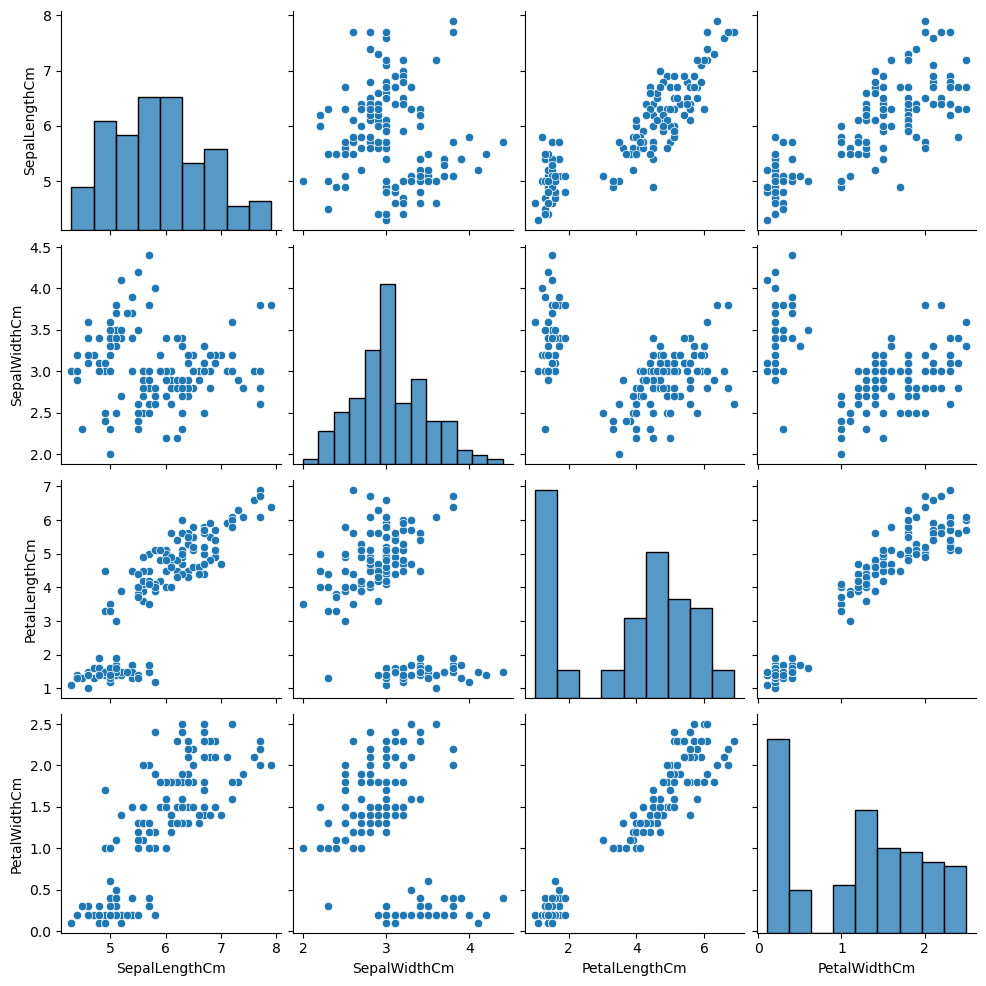

In [7]:
sns.pairplot(data)

In [8]:
num_val = data.corr()
num_val

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


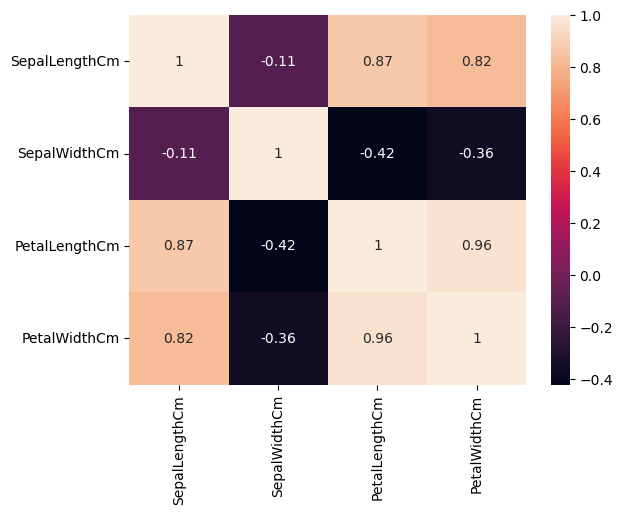

In [9]:
sns.heatmap(num_val, annot = True)
plt.show()

In [10]:
#Counting the number of species
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

SepalLengthCm


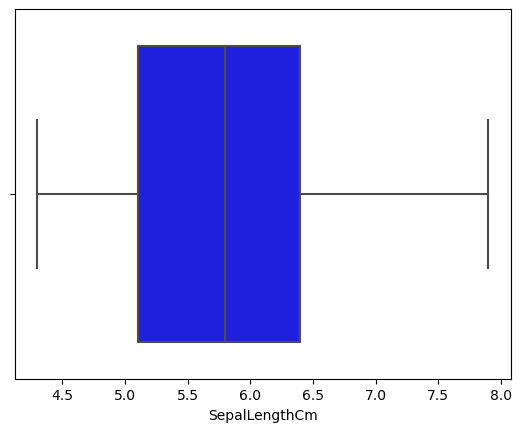

SepalWidthCm


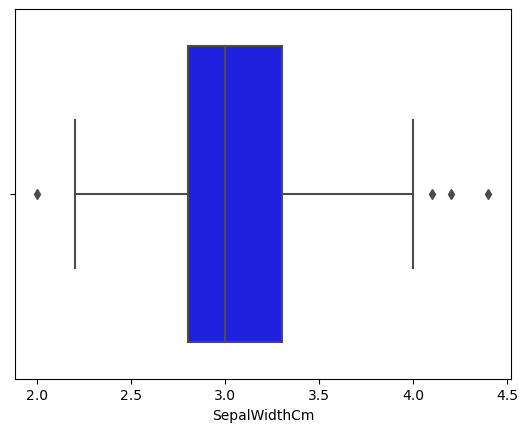

In [11]:
for col in data.iloc[:,0:2].columns:
    print(col)
    sns.boxplot(x = data[col], data = data, color = 'blue')
    plt.show()

In [12]:
def get_bounds(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3-Q1
    Upper = Q3+(1.5*IQR)
    Lower = Q1-(1.5*IQR)
    return Upper, Lower

In [13]:
num_col = ['SepalWidthCm']

In [14]:
for col in num_col:
    Upper, Lower = get_bounds(data, col)
    data[col] = np.where(data[col]>Upper, Upper, data[col])
    data[col] = np.where(data[col]<Lower, Lower, data[col])

SepalLengthCm


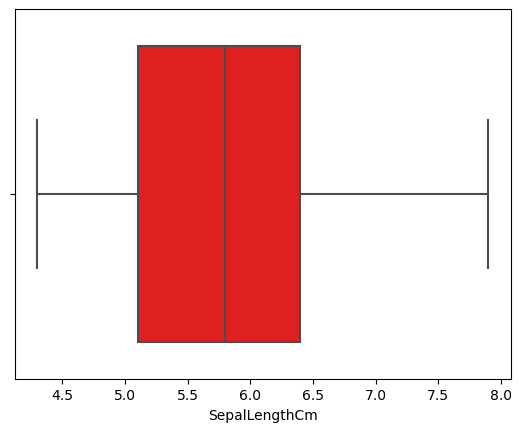

SepalWidthCm


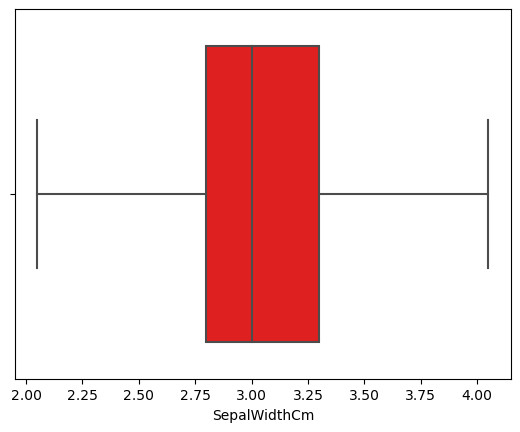

In [15]:
for col in data.iloc[:,0:2].columns:
    print(col)
    sns.boxplot(x = data[col], data = data, color = 'red')
    plt.show()

**Label Encoder :**

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Species'] = encoder.fit_transform(data['Species'])

# Train-Test Split :

In [17]:
x = data.drop('Species', axis = 1)
y = data['Species']

In [18]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [21]:
#checking the shape of the split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


**Standard Scaler:**

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# DecisionTree Classifier :

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [24]:
#predicting on train data
y_pred_train = tree.predict(x_train)

In [25]:
#predicting on test data
y_pred_test = tree.predict(x_test)

# Model Evaluation :

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [27]:
def modelEval(actual, predicted):
    accuracy = accuracy_score(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print('The accuracy of the Model is :', accuracy)
    print(class_rep)

In [28]:
print('------------Training Report----------------')
modelEval(y_train, y_pred_train)

------------Training Report----------------
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [29]:
print('------------Testing Report----------------')
modelEval(y_test, y_pred_test)

------------Testing Report----------------
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



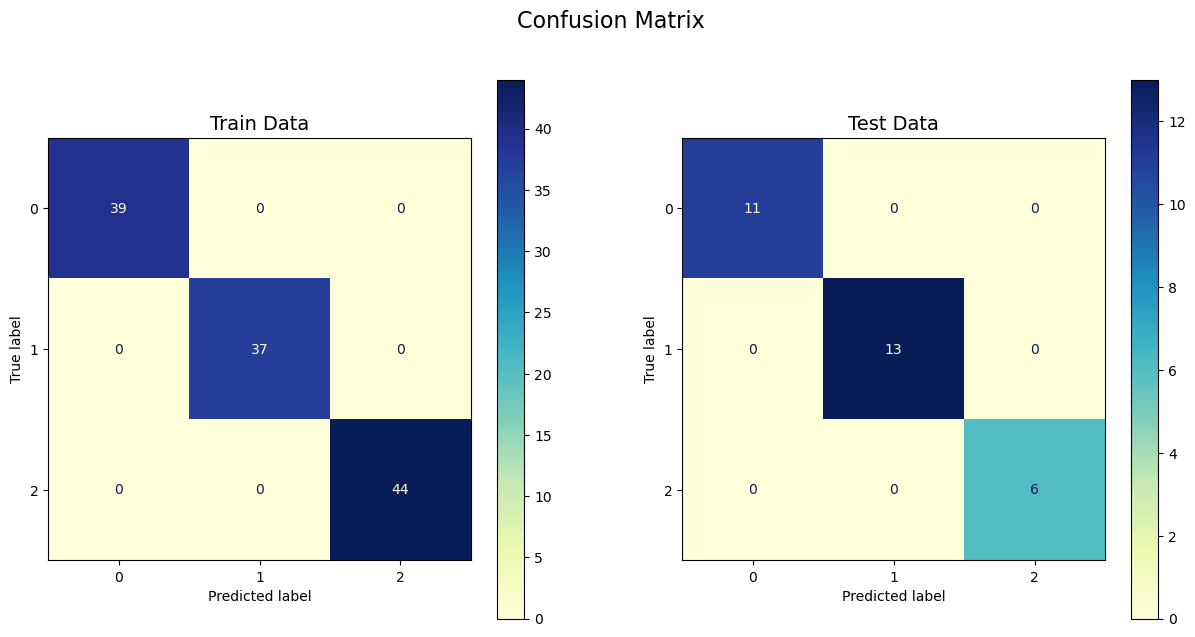

In [30]:
# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=tree, X=x_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=tree, X=x_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [31]:
#Comparing actual vs predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

In [32]:
df

,Actual,Predicted
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
100,2,2
40,0,0
86,1,1
76,1,1
71,1,1


**Observation :**

- We can observe that from the above **test report**, the **accuracy of the model is 1.0** since I have taken all the 4 features of the iris dataset for creating a decision tree model.
